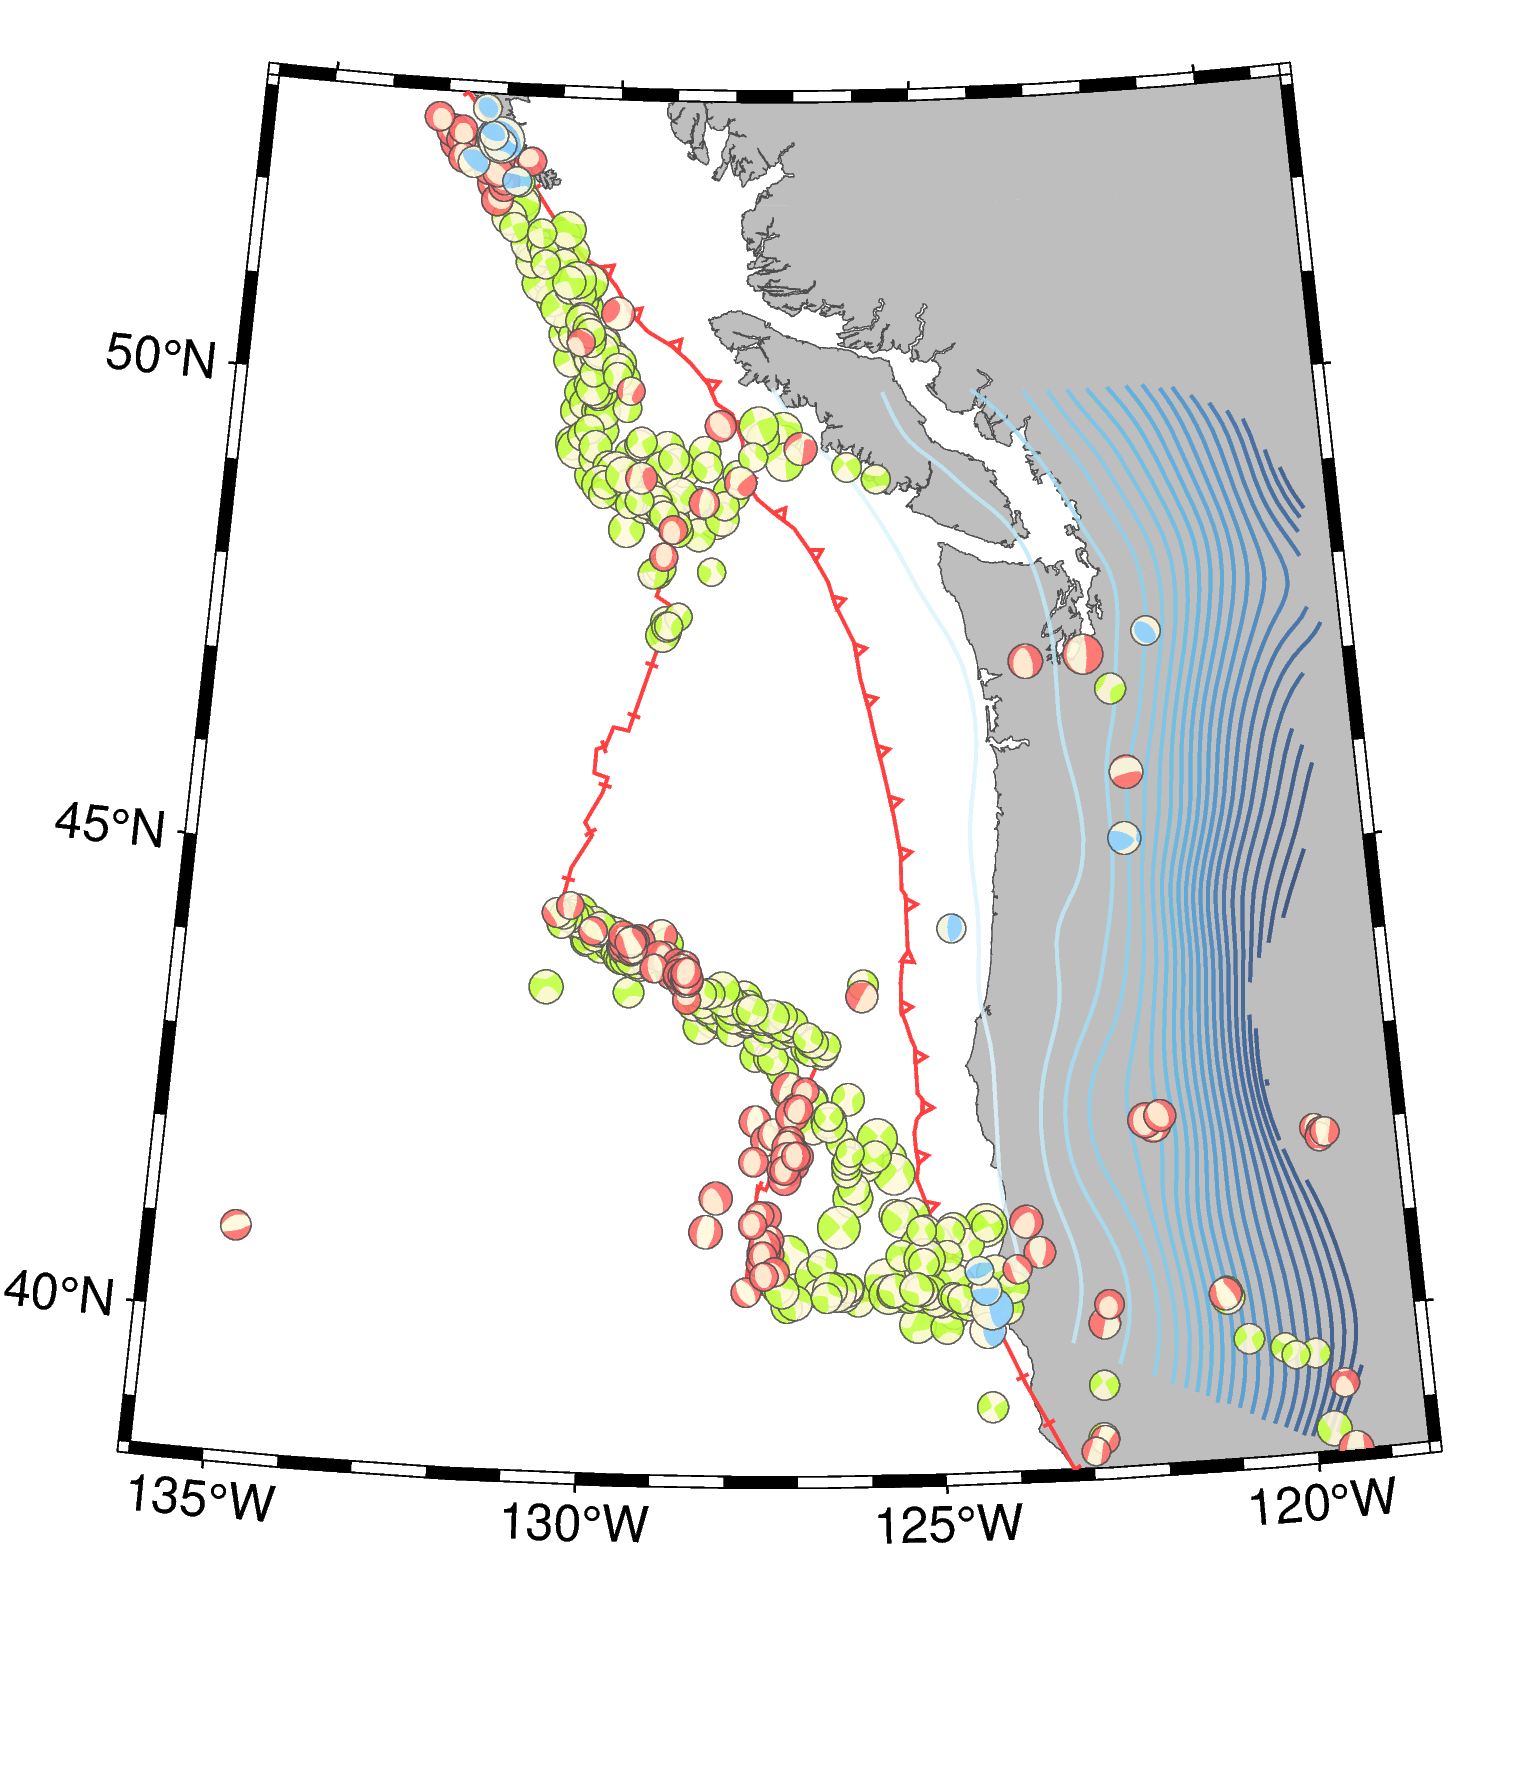

In [11]:
### GMT map plotting ###
import pygmt



fig = pygmt.Figure()

pygmt.config(MAP_FRAME_TYPE="fancy", FONT="Helvetica",\
             FONT_ANNOT_PRIMARY ="12p", FONT_LABEL = "11p") # figure config


## here we plot an empty background canvas which MUST BE larger than the main map (for xshift yshift to work)
fig.coast(region=[0, 13, 0, 15], projection="Q13c", frame=False, land="white")
# Width: 13 cm Height: 15cm
# Equidistant Cylindrical Projection (Plate Carrée)


## we then shift the main map relative to the background canvas, thus indirectly controlling the border width
fig.shift_origin(xshift="1.8c", yshift="1.5c") # does NOT include border width


## plotting the main map
fig.coast(region=[-136, -118.5, 38.5, 53.1],\
        projection="B-127.25/45.8/43.19/47.86/11c",\
        water="white", land="grey", shorelines="0.2,grey30",\
        frame=["WeSn", "fa"], resolution="h", area_thresh="1000")


## plotting slab 2.0 for the subducted Juan de Fuca plate (after Hayes et al. (2018))
pygmt.makecpt(output="bin/abyss_slab2.0", series=[-620, 0], cmap="bin/abyss.cpt")
fig.plot(data="bin/cas_slab2_dep_02.24.18_contours.in", cmap="bin/abyss_slab2.0",\
         pen=f"0.85p", transparency=15)

## plotting plate boundaries (after Bird, P. (2003))
fig.plot(data="bin/bird_plates.xy", pen=f"0.8p,brown1", style="f")


## plotting seismicity from the Harvard CMT catalogue
# Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
fig.meca(
    spec="bin/cascadiastrikeslip_dropname.xy",
    convention="mt", scale="0.25",
    compressionfill="olivedrab1",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid",
    transparency=12
)
fig.meca(
    spec="bin/cascadianormal_dropname.xy",
    convention="mt", scale="0.25",
    compressionfill="indianred1",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid",
    transparency=12
)
fig.meca(
    spec="bin/cascadiasubduction_dropname.xy",
    convention="mt", scale="0.25",
    compressionfill="skyblue1",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid",
    transparency=12
)


fig.show()
fig.savefig("cascadia.png")

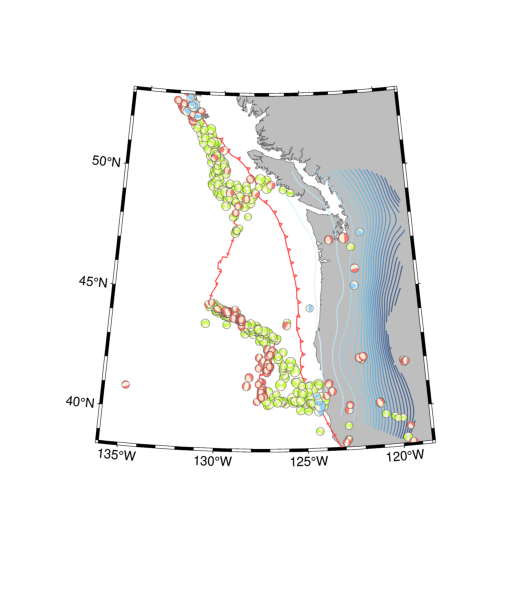

In [10]:
from IntPyGMT.IntPyGMT_overlay import gmt_png
%matplotlib widget

region=[-136, -118.5, 38.5, 53.1]
projection="B-127.25/45.8/43.19/47.86/11c"

gmt_png("cascadia.png", region, projection, "1.1c", "2.5c")